<a href="https://colab.research.google.com/github/vidhi-sys/LangChain_and_RAG/blob/main/01_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install transformers

# **TASK WITH PIPELINE USING PRETAINED MODELS IN TRANSFORMERS**

In [3]:
from transformers import pipeline
#helps call pretained model with pieplien library
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [4]:
classifier('i am not happy with my progress lately')

[{'label': 'NEGATIVE', 'score': 0.9997203946113586}]

Transformers acts as the model-definition framework for state-of-the-art machine learning models in text, computer vision, audio, video, and multimodal model, for both inference and training  Transformers provides everything you need for inference or training with state-of-the-art pretrained models. Some of the main features include:

* Pipeline: Simple and optimized inference class for many machine learning tasks like text generation, image segmentation, automatic speech recognition, document question answering, and more.

* Trainer: A comprehensive trainer that supports features such as mixed precision, torch.compile, and FlashAttention for training and distributed training for PyTorch models.

* generate: Fast text generation with large language models (LLMs) and vision language models (VLMs), including support for streaming and multiple decoding strategies.

In [6]:
classifier=pipeline('sentiment-analysis', model="google-bert/bert-base-multilingual-cased")

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [8]:
classifier('Ich freue mich.') #german

[{'label': 'LABEL_1', 'score': 0.5773078203201294}]

In [9]:
classifier('Je suis triste') #french

[{'label': 'LABEL_1', 'score': 0.5217309594154358}]

Check out the model on hugging face how it deals with emotions based on stars or numbers or metrics in various languages supported

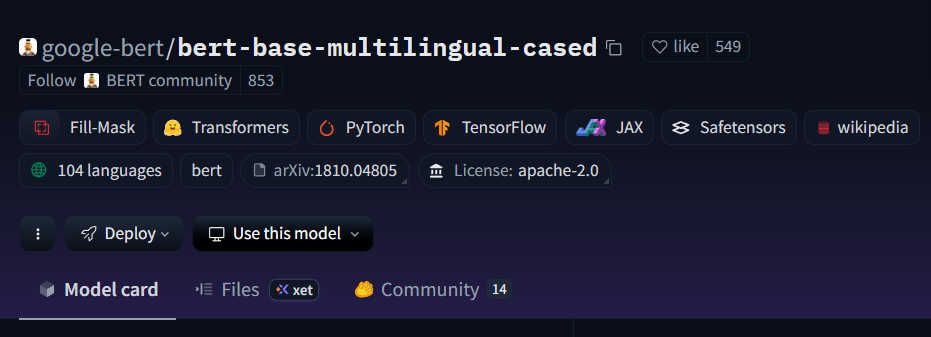

# **TOKENIZER**-convert text to numeric tokens for classification and other NLP tasks

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tf_model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [13]:
inputs = tokenizer("We are very happy to show you the 🤗 Transformers library.")

In [14]:
print(inputs)

{'input_ids': [101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [20]:
tf_batch = tokenizer(
    ["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

In [16]:
for key, value in tf_batch.items():
    print(f"{key}: {value.numpy().tolist()}")

input_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]


In [22]:
tf_outputs = tf_model(**tf_batch)


apply softmax to `tf_outputs.logits` to get prediction probabilities. Then, determine the predicted label and its corresponding score for each input sentence. This will provide a clear interpretation of the sentiment detected by the model.
```python
import torch.nn.functional as F

# Apply softmax to the logits to get probabilities
tf_predictions = F.softmax(tf_outputs.logits, dim=1)

# Get the predicted labels and their scores
predicted_labels = torch.argmax(tf_predictions, dim=1).tolist()
predicted_scores = tf_predictions.max(dim=1).values.tolist()

# Define the labels (assuming 0 for negative, 1 for positive based on the model)
labels = ["NEGATIVE", "POSITIVE"]

# Interpret the results
for i, (label_idx, score) in enumerate(zip(predicted_labels, predicted_scores)):
    print(f"Sentence {i+1}: Predicted Label: {labels[label_idx]}, Score: {score:.4f}")
```

## Apply Softmax and Interpret Output


Apply softmax to the `tf_outputs.logits` to get prediction probabilities and interpret the results of the sentiment analysis.


**Reasoning**:
The subtask is to apply softmax to the model's logits, extract predicted labels and scores, and then interpret these results with human-readable labels. This code block will perform all these operations step-by-step.



In [23]:
import torch.nn.functional as F

# Apply softmax to the logits to get prediction probabilities
tf_predictions = F.softmax(tf_outputs.logits, dim=1)

# Determine the predicted labels (index of the maximum probability)
predicted_labels = tf_predictions.argmax(dim=1).tolist()

# Extract the predicted scores (maximum probability value)
predicted_scores = tf_predictions.max(dim=1).values.tolist()

# Define the labels to map numerical predictions to human-readable sentiment
labels = ['NEGATIVE', 'POSITIVE']

# Iterate and print the interpreted sentiment for each input sentence
for i, (label_idx, score) in enumerate(zip(predicted_labels, predicted_scores)):
    sentiment_label = labels[label_idx]
    print(f"Sentence {i+1}: Sentiment: {sentiment_label}, Score: {score:.4f}")

Sentence 1: Sentiment: POSITIVE, Score: 0.9998
Sentence 2: Sentiment: NEGATIVE, Score: 0.5309


## Save Model and Tokenizer

Save the current `tf_model` and `tokenizer` to local storage for later use.


**Reasoning**:
To save the model and tokenizer, I need to import the `os` module for path manipulation and directory creation, then use the `save_pretrained` method for both `tf_model` and `tokenizer`.



In [24]:
import os

# Define a directory name to save the model and tokenizer
save_directory = "./sentiment_model"

# Create the directory if it does not exist
os.makedirs(save_directory, exist_ok=True)

# Save the model
tf_model.save_pretrained(save_directory)
print(f"Model saved to {save_directory}")

# Save the tokenizer
tokenizer.save_pretrained(save_directory)
print(f"Tokenizer saved to {save_directory}")

Model saved to ./sentiment_model
Tokenizer saved to ./sentiment_model


## Explain Conceptual Fine-tuning


Provide a conceptual explanation of fine-tuning large language models, including its relevance to the current sentiment analysis model and the general steps for fine-tuning on a custom dataset.


## Explain Conceptual Fine-tuning

Provide a conceptual explanation of fine-tuning large language models, including its relevance to the current sentiment analysis model and the general steps for fine-tuning on a custom dataset.



### Conceptual Explanation of Fine-tuning Large Language Models (LLMs)

Fine-tuning is a powerful technique in machine learning, particularly with Large Language Models (LLMs), where a model that has already been trained on a massive amount of general data (pre-trained) is further trained on a smaller, task-specific dataset. The goal is to adapt the model's vast general knowledge to perform well on a particular downstream task, such as sentiment analysis, question answering, or text summarization.

1.  **Concept of Fine-tuning LLMs**: Imagine an LLM as a highly educated generalist. It has learned grammar, semantics, and world knowledge from billions of text documents. While it's intelligent, it might not be an expert in every specific domain. Fine-tuning is like giving this generalist LLM a specialized internship. You expose it to a smaller dataset directly relevant to a specific task, allowing it to refine its understanding and adjust its internal parameters to excel at that particular job.

2.  **Relevance to the Current Sentiment Analysis Model**: The `distilbert-base-uncased-finetuned-sst-2-english` model we've been using is an excellent example of a pre-trained and fine-tuned model. It started as `distilbert-base-uncased`, which is a smaller, faster version of BERT, pre-trained on a vast corpus of English text to understand language fundamentals. Subsequently, it was *fine-tuned* on the SST-2 (Stanford Sentiment Treebank) dataset, which is specifically designed for binary sentiment classification (positive/negative). This fine-tuning process enabled the model to accurately classify the sentiment of movie reviews, which is why it performs so well in our examples. Without this fine-tuning step, the base DistilBERT model would likely struggle with sentiment prediction.

3.  **General Process for Fine-tuning on a Custom Dataset**: If you have a specific task or domain for which you need a specialized model, you can follow these general steps to fine-tune a pre-trained LLM:

    a.  **Data Preparation**: This is a crucial first step. You need to collect and annotate a dataset that is highly relevant to your target task. For instance, if you want to analyze sentiment in financial news, you'd collect a dataset of financial headlines labeled with sentiment (e.g., positive, negative, neutral). The data needs to be cleaned, preprocessed, and formatted consistently, often into input-label pairs that the model can learn from.

    b.  **Loading a Pre-trained Model and Tokenizer**: You start by loading a suitable pre-trained model (e.g., BERT, RoBERTa, DistilBERT) and its corresponding tokenizer from a library like Hugging Face Transformers. The tokenizer is essential for converting your raw text into the numerical input format (tokens and attention masks) that the model understands.

    c.  **Adapting the Model's Output Layer**: Pre-trained LLMs often have a generic output layer suitable for their initial pre-training objectives (like predicting masked words). For fine-tuning, you typically need to replace or adapt this output layer to match your specific task. For example, in a classification task, you would add a new classification head with the number of output neurons equal to the number of classes in your custom dataset (e.g., 3 neurons for positive, negative, neutral sentiment).

    d.  **Training the Model on the Custom Dataset**: With the adapted model and prepared data, you then train the model using your custom dataset. During this phase, the model's weights (including those from the pre-trained layers, often with a smaller learning rate, and the new output layer) are updated based on the task-specific loss. This iterative process allows the model to learn the nuances of your specific task while retaining its broad linguistic understanding.

    e.  **Evaluating the Fine-tuned Model's Performance**: After training, you evaluate the model's performance on a separate validation or test set from your custom dataset. Metrics like accuracy, precision, recall, F1-score (for classification), or R-squared (for regression) are used to assess how well the model has learned the new task. This evaluation helps determine if further adjustments to the training data, model architecture, or hyperparameters are needed.